In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
data = pd.read_excel("Airlines+Data.xlsx")
data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


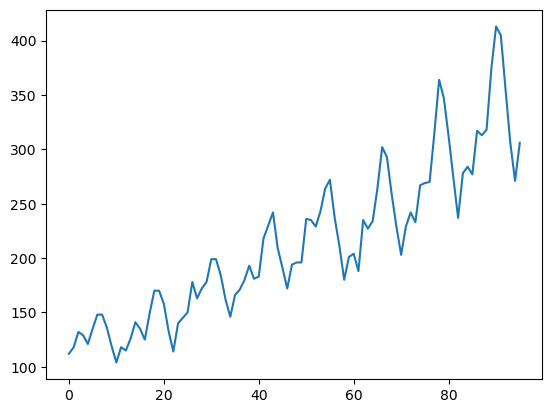

In [4]:
plt.plot(data['Passengers'])

C:\Users\marang\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Passengers', ylabel='Density'>

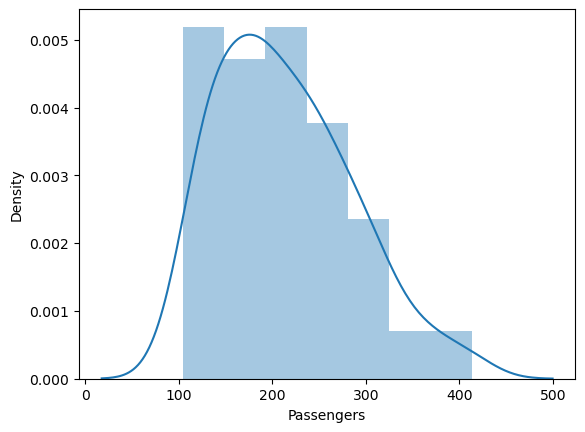

In [5]:
sns.distplot(data['Passengers'])

In [6]:
data.rename(columns={'Month':'Date'},inplace=True)
data

,Date,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [8]:
data['year'] = data.Date.dt.strftime('%Y')
data['month'] = data.Date.dt.strftime('%b')
data['date'] = data.Date.dt.strftime('%d')
data

,Date,Passengers,year,month,date
0,1995-01-01,112,1995,Jan,01
1,1995-02-01,118,1995,Feb,01
2,1995-03-01,132,1995,Mar,01
3,1995-04-01,129,1995,Apr,01
4,1995-05-01,121,1995,May,01
...,...,...,...,...,...
91,2002-08-01,405,2002,Aug,01
92,2002-09-01,355,2002,Sep,01
93,2002-10-01,306,2002,Oct,01
94,2002-11-01,271,2002,Nov,01


In [11]:
table = pd.pivot_table(data=data,index='year',columns='month',values='Passengers',aggfunc='mean',fill_value=0)
table

month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
year,,,,,,,,,,,,
1995,129,148,118,118,112,148,135,132,121,104,119,136
1996,135,170,140,126,115,170,149,141,125,114,133,158
1997,163,199,166,150,145,199,178,178,172,146,162,184
1998,181,242,194,180,171,230,218,193,183,172,191,209
1999,235,272,201,196,196,264,243,236,229,180,211,237
2000,227,293,229,188,204,302,264,235,234,203,229,259
2001,269,347,278,233,242,364,315,267,270,237,274,312
2002,313,405,306,277,284,413,374,317,318,271,306,355


<AxesSubplot:xlabel='month', ylabel='year'>

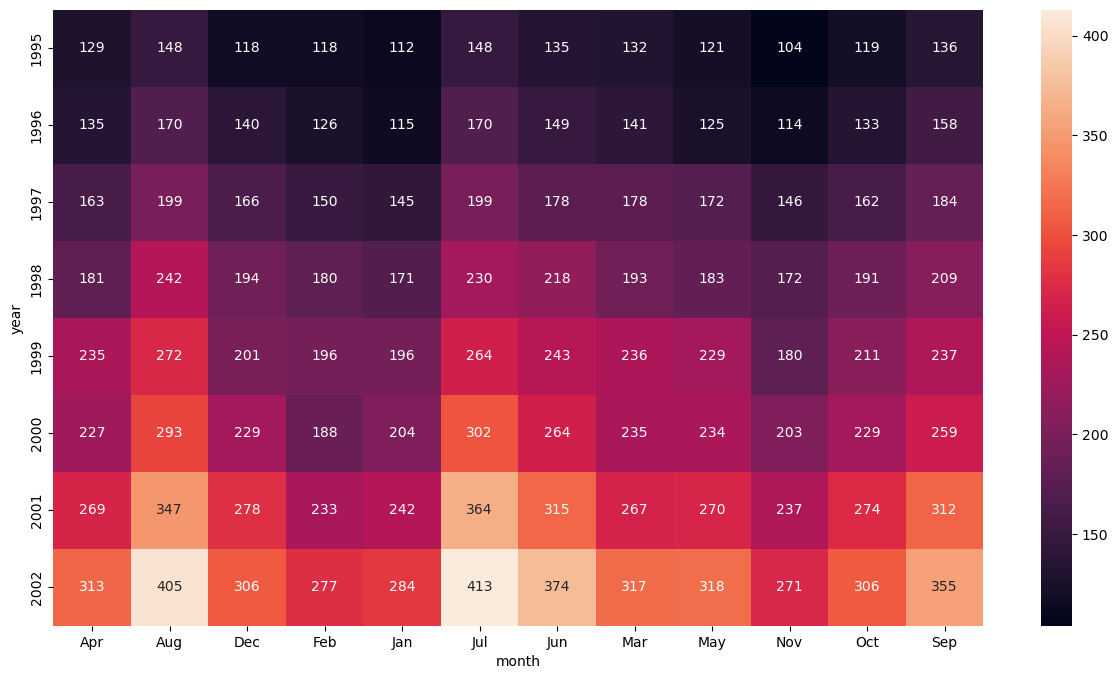

In [12]:
plt.figure(figsize=(15,8))
sns.heatmap(data=table,annot=True,fmt='g')

In [13]:
data['t'] = np.arange(0,96)
data['t_sq'] = data['t']*data['t']
data['log_passenger'] = np.log(data['Passengers'])
data

,Date,Passengers,year,month,date,t,t_sq,log_passenger
0,1995-01-01,112,1995,Jan,01,0,0,4.718499
1,1995-02-01,118,1995,Feb,01,1,1,4.770685
2,1995-03-01,132,1995,Mar,01,2,4,4.882802
3,1995-04-01,129,1995,Apr,01,3,9,4.859812
4,1995-05-01,121,1995,May,01,4,16,4.795791
...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002,Aug,01,91,8281,6.003887
92,2002-09-01,355,2002,Sep,01,92,8464,5.872118
93,2002-10-01,306,2002,Oct,01,93,8649,5.723585
94,2002-11-01,271,2002,Nov,01,94,8836,5.602119


In [14]:
mon_dummies = pd.get_dummies(data['month'])
mon_dummies

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [15]:
airline = pd.concat([data,mon_dummies], axis=1)
airline

,Date,Passengers,year,month,date,t,t_sq,log_passenger,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,1995,Jan,01,0,0,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,1995,Feb,01,1,1,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995,Mar,01,2,4,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,1995,Apr,01,3,9,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995,May,01,4,16,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002,Aug,01,91,8281,6.003887,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,2002,Sep,01,92,8464,5.872118,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,2002,Oct,01,93,8649,5.723585,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,2002,Nov,01,94,8836,5.602119,0,0,0,0,0,0,0,0,0,1,0,0


In [16]:
train = airline.head(80)
test = airline.tail(16)

## Linear Model

In [17]:
lin_mod = smf.ols('Passengers~t',data=train).fit()
pred_lin = pd.Series(lin_mod.predict(test['t']))
rmse_lin = np.sqrt(mean_squared_error(test['Passengers'], pred_lin))
rmse_lin

47.54262406772675

## Exponential Model

In [19]:
exp_mod = smf.ols('log_passenger~t',data=train).fit()
pred_exp = pd.Series(exp_mod.predict(test['t']))
rmse_exp = np.sqrt(mean_squared_error(test['Passengers'],np.exp(pred_exp)))
rmse_exp

43.79373939334322

## Quadratic Model

In [21]:
quad_model = smf.ols('Passengers~t+t_sq',data=train).fit()
quad_pred = pd.Series(quad_model.predict(test[['t','t_sq']]))
rmse_quad = np.sqrt(mean_squared_error(test['Passengers'],quad_pred))
rmse_quad

43.65440369584217

## Addictive Seasonality Model

In [27]:
add_mod = smf.ols('Passengers~Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data=train).fit()
add_pred = pd.Series(add_mod.predict(test[['Apr','Aug','Dec','Feb','Jan','Jul','Jun','Mar','May','Nov','Oct','Sep']]))
rmse_add = np.sqrt(mean_squared_error(test['Passengers'],add_pred))
rmse_add

129.266476414433

## Addictive Seasonality Quadratic Model

In [28]:
asq_mod = smf.ols('Passengers~t+t_sq+Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data=train).fit()
asq_pred = pd.Series(asq_mod.predict(test[['Apr','Aug','Dec','Feb','Jan','Jul','Jun','Mar','May','Nov','Oct','Sep','t','t_sq']]))
rmse_asq = np.sqrt(mean_squared_error(test['Passengers'],asq_pred))
rmse_asq

23.91098357009491

## multiplicative Seasonality Model

In [30]:
ms_mod = smf.ols('log_passenger~Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data=train).fit()
ms_pred = pd.Series(ms_mod.predict(test[['Apr','Aug','Dec','Feb','Jan','Jul','Jun','Mar','May','Nov','Oct','Sep']]))
rmse_ms = np.sqrt(mean_squared_error(test['log_passenger'],np.exp(ms_pred)))
rmse_ms

178.0181209460812

## Multiplicative Addictive Seasonality Model

In [32]:
mas_mod = smf.ols('log_passenger~t+Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data=train).fit()
mas_pred = pd.Series(mas_mod.predict(test[['Apr','Aug','Dec','Feb','Jan','Jul','Jun','Mar','May','Nov','Oct','Sep','t']]))
rmse_mas = np.sqrt(mean_squared_error(test['Passengers'],np.exp(mas_pred)))
rmse_mas

9.46900023046583

#### Multiplicative Addictive Seasonality Model gives the best result

In [33]:
data

,Date,Passengers,year,month,date,t,t_sq,log_passenger
0,1995-01-01,112,1995,Jan,01,0,0,4.718499
1,1995-02-01,118,1995,Feb,01,1,1,4.770685
2,1995-03-01,132,1995,Mar,01,2,4,4.882802
3,1995-04-01,129,1995,Apr,01,3,9,4.859812
4,1995-05-01,121,1995,May,01,4,16,4.795791
...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002,Aug,01,91,8281,6.003887
92,2002-09-01,355,2002,Sep,01,92,8464,5.872118
93,2002-10-01,306,2002,Oct,01,93,8649,5.723585
94,2002-11-01,271,2002,Nov,01,94,8836,5.602119


In [36]:
# building dataset on future dates

month = pd.date_range(start='1/1/2003', end='12/1/2003',freq='MS')
month

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01', '2003-11-01', '2003-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [37]:
t = np.arange(97,109)
t

array([ 97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108])

In [38]:
t_sq = t*t
t_sq

array([ 9409,  9604,  9801, 10000, 10201, 10404, 10609, 10816, 11025,
       11236, 11449, 11664])

In [40]:
mon = pd.DataFrame(month,columns=['Date'])
mon

,Date
0,2003-01-01
1,2003-02-01
2,2003-03-01
3,2003-04-01
4,2003-05-01
5,2003-06-01
6,2003-07-01
7,2003-08-01
8,2003-09-01
9,2003-10-01


In [43]:
df = {'t':t, 't_sq': t_sq}
value = pd.DataFrame(df)
value

,t,t_sq
0,97,9409
1,98,9604
2,99,9801
3,100,10000
4,101,10201
5,102,10404
6,103,10609
7,104,10816
8,105,11025
9,106,11236


In [44]:
data1 = pd.concat([mon, value],axis=1)
data1

,Date,t,t_sq
0,2003-01-01,97,9409
1,2003-02-01,98,9604
2,2003-03-01,99,9801
3,2003-04-01,100,10000
4,2003-05-01,101,10201
5,2003-06-01,102,10404
6,2003-07-01,103,10609
7,2003-08-01,104,10816
8,2003-09-01,105,11025
9,2003-10-01,106,11236


In [46]:
data1['Day'] = data['Date'].dt.strftime('%d')
data1['Month'] = data['Date'].dt.strftime('%b')
data1['Year'] = data['Date'].dt.strftime('%Y')
data1

,Date,t,t_sq,Day,Month,Year
0,2003-01-01,97,9409,01,Jan,1995
1,2003-02-01,98,9604,01,Feb,1995
2,2003-03-01,99,9801,01,Mar,1995
3,2003-04-01,100,10000,01,Apr,1995
4,2003-05-01,101,10201,01,May,1995
5,2003-06-01,102,10404,01,Jun,1995
6,2003-07-01,103,10609,01,Jul,1995
7,2003-08-01,104,10816,01,Aug,1995
8,2003-09-01,105,11025,01,Sep,1995
9,2003-10-01,106,11236,01,Oct,1995


In [51]:
mon_dummy = pd.get_dummies(data1['Month'])
mon_dummy

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
5,0,0,0,0,0,0,1,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,1,0


In [52]:
final = pd.concat([data1,mon_dummy],axis=1)
final

,Date,t,t_sq,Day,Month,Year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,2003-01-01,97,9409,01,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0
1,2003-02-01,98,9604,01,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,2003-03-01,99,9801,01,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,2003-04-01,100,10000,01,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,2003-05-01,101,10201,01,May,1995,0,0,0,0,0,0,0,0,1,0,0,0
5,2003-06-01,102,10404,01,Jun,1995,0,0,0,0,0,0,1,0,0,0,0,0
6,2003-07-01,103,10609,01,Jul,1995,0,0,0,0,0,1,0,0,0,0,0,0
7,2003-08-01,104,10816,01,Aug,1995,0,1,0,0,0,0,0,0,0,0,0,0
8,2003-09-01,105,11025,01,Sep,1995,0,0,0,0,0,0,0,0,0,0,0,1
9,2003-10-01,106,11236,01,Oct,1995,0,0,0,0,0,0,0,0,0,0,1,0


In [55]:
final_pred = mas_mod.predict(final)

In [56]:
final_pred

0     5.775485
1     5.791078
2     5.935442
3     5.899711
4     5.889992
5     6.008354
6     6.115617
7     6.115993
8     6.006672
9     5.879591
10    5.750080
11    5.885304
dtype: float64

In [57]:
X = np.exp(final_pred)
X

0     322.300737
1     327.365856
2     378.207256
3     364.931945
4     361.402437
5     406.813139
6     452.875430
7     453.045477
8     406.129524
9     357.662998
10    314.215689
11    359.712138
dtype: float64

In [58]:
final_pred = pd.DataFrame(X, columns=['final_pred'])
final_pred

,final_pred
0,322.300737
1,327.365856
2,378.207256
3,364.931945
4,361.402437
5,406.813139
6,452.875430
7,453.045477
8,406.129524
9,357.662998


In [59]:
pred_data = pd.concat([final, round(final_pred)], axis=1)
pred_data

,Date,t,t_sq,Day,Month,Year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,final_pred
0,2003-01-01,97,9409,01,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0,322.0
1,2003-02-01,98,9604,01,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0,327.0
2,2003-03-01,99,9801,01,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0,378.0
3,2003-04-01,100,10000,01,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0,365.0
4,2003-05-01,101,10201,01,May,1995,0,0,0,0,0,0,0,0,1,0,0,0,361.0
5,2003-06-01,102,10404,01,Jun,1995,0,0,0,0,0,0,1,0,0,0,0,0,407.0
6,2003-07-01,103,10609,01,Jul,1995,0,0,0,0,0,1,0,0,0,0,0,0,453.0
7,2003-08-01,104,10816,01,Aug,1995,0,1,0,0,0,0,0,0,0,0,0,0,453.0
8,2003-09-01,105,11025,01,Sep,1995,0,0,0,0,0,0,0,0,0,0,0,1,406.0
9,2003-10-01,106,11236,01,Oct,1995,0,0,0,0,0,0,0,0,0,0,1,0,358.0
